# Feedback
## Exercise 1
1. excellent job! 1/1

2. great, I was only missing a more direct comparison to the PCA plots, which you do not compare. 0.8/1

1.8/2

## Exercise 2
1. very good 2/2
2. fine 1/1

3/3

## Exercise 3
1. The description of ccp_alpha is insufficient. What is a "weak link" (I know they use this in the documentation, but do you understand what this means?), what does alpha stand for? Also the difference to reduced error pruning is not correct, both are iterative.

Además hay otro grupo con practicamente la misma respuesta. 0/1
2. Careful!
```python
  repetitions=100
  for i in range(repetitions):
      precision = []
      for a in ccp_alfa:
```
This is not the way to do it. You should go:
```python
  repetitions=100
  mean_precisions = []
  for a in ccp_alfa:
    precisions_for_alpha = []
    for i in range(repetitions):  
```
then store the mean precisions per alpha, and pick the best one in the end. The trees without pruning are shorter than with pruning (cannot be the case right?)

Again, another group has a *very* similar solution!

0.5/1

3. good (except the mistakes discussed) 1/1

Total: 1 + 0.8 + 2 + 1 + 0 + 0.5 + 1 = 6.7/8

# Universidad de La Sabana 

**Felix Mohr**

## Facultad de Ingenería 2022.2
Supervised Machine Learning


- Gerson Barrera
- Santiago Merchán
- Rodrigo Carranza

Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.linalg
import scipy.stats
from scipy.stats import norm as normal
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.discriminant_analysis
from sklearn.model_selection import train_test_split
import sklearn.tree
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import sklearn.datasets as dfs
from numpy import percentile
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pprint import pprint
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from numpy import linspace
import random
%matplotlib inline

Data Ingestion

In [2]:
iris_X,iris_y=sklearn.datasets.load_iris()["data"],sklearn.datasets.load_iris()["target"]
breast_X,breast_y=sklearn.datasets.load_breast_cancer()["data"],sklearn.datasets.load_breast_cancer()["target"]
digits_X,digits_y=sklearn.datasets.load_digits()["data"],sklearn.datasets.load_digits()["target"]
wine_X,wine_y=sklearn.datasets.load_wine()["data"],sklearn.datasets.load_wine()["target"]

#**Exercise 1**

1. Write a function create_lda_projection(X,y) that will use the LDA to create a scatter plot of the data. To this end, fit an LDA model with scikit-learn and then use the transform function of the LDA to make a projection of the data. If the projection is 1D, use 0 as the value in the second coordinate. If the projection is 2D, create a standard 2D plot. If the projection is 3D, create a 3D plot. If the projection would have more than 3 dimensions (minfk 􀀀 1; dg > 3), then use the n_components parameter of the LDA to limit it to 3 dimensions or only consider the first 3 columns of the projected data. Make sure that you plot the instances of all the classes in different colors (one per class).

2. Apply the function to all datasets in B, and also create a the respective plots with the PCA again. Compare the usefulness of the two reduction techniques for the visual inspection with the goal of assessing the separability of the concepts.

1.1

In [3]:
from turtle import color
import plotly.express as px
def create_lda_projection(X,y): 
    lda=sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
    X_trans=lda.fit_transform(X,y)
    total_var = lda.explained_variance_ratio_.sum() * 100
    components=X_trans.shape[1]

    if components==1:
        #X=X_trans
        #X = np.arange(10)
        #plt.scatter( X, [0] * X.shape[0],c=np.unique(y)) 
        fig, ax = plt.subplots()
        for label in np.unique(y):
            mask= y ==label
            ax.scatter(X_trans[mask],np.count_nonzero(mask)*[0.5],label=label)
            ax.legend
            fig.show()
    if components==2:
        finalDf = pd.DataFrame(data = X_trans, columns = ['LDA 1', 'LDA 2'])
        #finalDf = pd.concat([finalDf, y], axis = 1)
        fig, ax = plt.subplots()
        for label in np.unique(y):
            mask= y ==label
            ax.scatter(X_trans[mask,0],X_trans[mask,1],label=label)
            ax.legend()
            
        print(f"LDA 1 explica el ratio de varianza en: {round(lda.explained_variance_ratio_[0],2)*100}% y LDA2 : {round(lda.explained_variance_ratio_[1],4)*100}%")      
    elif components>=3: 
        X_trans=X_trans[:,:3]
        finalDf = pd.DataFrame(data = X_trans, columns = ['LDA 1', 'LDA 2', 'LDA 3'])
        #finalDf = pd.concat([finalDf, df[[label]]], axis = 1)    
        #fig, ax = plt.subplots()
        fig = px.scatter_3d(
            X_trans, x=0, y=1, z=2, color=y, 
            title=f'Total Explained Variance: {total_var:.2f}%',
            labels={'0': 'LDA 1', '1': 'LDA 2', '2': 'LDA 3'}
            )
        fig.show()
        print(f"LDA 1 explica el ratio de varianza en: {round(lda.explained_variance_ratio_[0],2)*100}% , LDA 2 : {round(lda.explained_variance_ratio_[1],4)*100}% y LDA 3 : {round(lda.explained_variance_ratio_[2],4)*100}%")
    return X_trans.shape
    del X_trans

1.2

LDA 1 explica el ratio de varianza en: 99.0% y LDA2 : 0.88%


(150, 2)

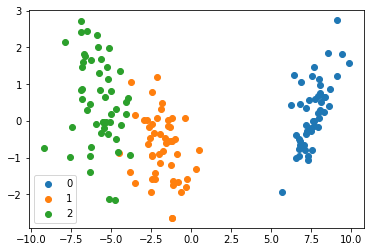

In [4]:
create_lda_projection(iris_X,iris_y)

/home/felix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(569, 1)

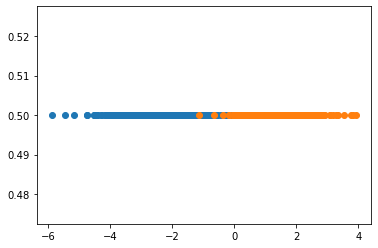

In [5]:
create_lda_projection(breast_X,breast_y)

In [6]:
create_lda_projection(digits_X,digits_y)

LDA 1 explica el ratio de varianza en: 28.999999999999996% , LDA 2 : 18.26% y LDA 3 : 16.96%


(1797, 3)

LDA 1 explica el ratio de varianza en: 69.0% y LDA2 : 31.25%


(178, 2)

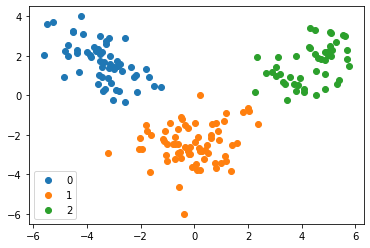

In [7]:
create_lda_projection(wine_X,wine_y)

In [8]:
def dimensionality_reduction(X,y,components):
    df=pd.DataFrame(data = X)
    df["target"]=y
    df["target"]=df["target"].astype(str)    
    num_cols=list(df.select_dtypes(include='number'))
    df1=StandardScaler().fit_transform(df[num_cols])
    pca = PCA(n_components=components)
    principalComponents = pca.fit_transform(df1)
    if components==2:
        #finalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
        #finalDf = pd.concat([finalDf, finalDf[[label]]], axis = 1)
        print(f"el primer componente principal explica el ratio de varianza en: {round(pca.explained_variance_ratio_[0],2)*100}% y el segundo : {round(pca.explained_variance_ratio_[1],4)*100}%")      
        fig = px.scatter(principalComponents, x=0, y=1, color=df["target"])
        fig.show()
    elif components==3: 
        #finalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
        #finalDf = pd.concat([finalDf, finalDf[[label]]], axis = 1)
        print(f"el primer componente principal explica el ratio de varianza en: {round(pca.explained_variance_ratio_[0],2)*100}% y el segundo : {round(pca.explained_variance_ratio_[1],4)*100}% y el tercero : {round(pca.explained_variance_ratio_[2],4)*100}%")
        total_var = pca.explained_variance_ratio_.sum() * 100

        fig = px.scatter_3d(
            principalComponents, x=0, y=1, z=2, color=df["target"],
            title=f'Total Explained Variance: {total_var:.2f}%',
            labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
        )
        fig.show()

In [9]:
dimensionality_reduction(iris_X,iris_y,2)
dimensionality_reduction(breast_X,breast_y,2)
dimensionality_reduction(digits_X,digits_y,2)
dimensionality_reduction(wine_X,wine_y,2)

el primer componente principal explica el ratio de varianza en: 73.0% y el segundo : 22.85%


el primer componente principal explica el ratio de varianza en: 44.0% y el segundo : 18.970000000000002%


el primer componente principal explica el ratio de varianza en: 12.0% y el segundo : 9.56%


el primer componente principal explica el ratio de varianza en: 36.0% y el segundo : 19.21%


In [11]:
dimensionality_reduction(iris_X,iris_y,3)
dimensionality_reduction(breast_X,breast_y,3)
dimensionality_reduction(digits_X,digits_y,3)
dimensionality_reduction(wine_X,wine_y,3)

el primer componente principal explica el ratio de varianza en: 73.0% y el segundo : 22.85% y el tercero : 3.6700000000000004%


el primer componente principal explica el ratio de varianza en: 44.0% y el segundo : 18.970000000000002% y el tercero : 9.39%


el primer componente principal explica el ratio de varianza en: 12.0% y el segundo : 9.56% y el tercero : 8.44%


el primer componente principal explica el ratio de varianza en: 36.0% y el segundo : 19.21% y el tercero : 11.12%


En Conclusión, cuando corrimos la función en cada uno de los cuatro Datasets, identificamos que el LDA logra separar muy bien 2 de tres clases de Iris, por el lado de Breast Cancer también hace un muy buen trabajo separando las dos clases. Analizando el Dataset de Digits se observa que también logra separar algunas clases aunque al tener más, resulta dificil de analizar en la gráfica de LDA. Para el caso de Wine Dataset, LDA separa cada una de las tres clases de una forma magistral.

# **Exercise 2** 
1. Write a function analyze_dt_performances(X, y)that creates 4 plots, comparing the performance of a decision tree for different configurations. For all values η ∈ {1,..,50}and 100 values for the min_impurity_decrease parameter between 0 and 0.1, compute the 5-fold cross validation score of a decision tree that uses the respective parameters. Store the results in a matrix and visualize it once with a surface plot and once with a heatmap (imshow). This should give you 8 plots in total(2 for each dataset). 
Here, you implicitly used entropy as the criterion.Now do the same using the gini coefficient as a criterion. This gives then 4 plots in total for the given data (X,y).The function should return the overall best configuration (split criterion,η,min_impurity_decrease)for the given dataset.

2. apply the function to all datasets in Band report the best configuration for each of them.

2.1

Utils Functions

In [12]:
def plot_heatmap(df_matriz):
  fig, ax = plt.subplots(figsize=(10,12))  
  sns.heatmap(df_matriz, annot=False, linewidths=.7, ax=ax)
  ax.set_title('Heatmap Plot')

  plt.show()

def plot_surface_(df):
  index = df.index
  columns = df.columns
  x, y = np.meshgrid(np.arange(len(columns)), np.arange(len(index)))
  z = np.array([[df[c][i] for c in columns] for i in index])
  
  axes = plt.figure(figsize=(10, 10)).gca(projection='3d')
  axes.set_title('Surface Plot')
  surf = axes.plot_surface(x, y, z, cmap = plt.cm.cividis)

  axes.set_xlabel('ETA Points', labelpad=20)
  axes.set_ylabel('IMPURITY Points', labelpad=20)
  axes.set_zlabel('TEST SCORE', labelpad=40)

  plt.tight_layout()
  plt.show()

Main Function

In [13]:
def analyze_dt_performances(X, y):
  cv_scores = []
  e_rate = []
  matrix_elements = []
  params_combinations=[]
  criterios = ["entropy", "gini"]
  min_impurity_decrease_list = linspace(start = 0,stop = 0.1,num =100)
  eta = range(2,51)
  for criterio in criterios:
    for e in eta:
      for n in min_impurity_decrease_list:
        clf = sklearn.tree.DecisionTreeClassifier(min_samples_split =e, min_impurity_decrease=n, criterion= criterio)
        X_train,X_val,y_train,y_val = train_test_split(X, y, train_size=0.8)
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_val)
        #error_rate = np.count_nonzero(y_hat != y_val)/len(y_val)
        scores = np.mean(sklearn.model_selection.cross_validate(estimator=clf, X=X, y=y, cv=5, n_jobs=4)['test_score'])
      
        cv_scores.append(scores)
        min_score = scores.min()
        #e_rate.append(error_rate)
        matrix_elements.append((e, n, scores))
        params_combinations.append((e, n, criterio, scores))
        #print(n, e, clf_scores )

    df = pd.DataFrame(data = matrix_elements, columns = ['eta', 'impurity', 'score'])
    df.score = round(df.score, 2)
    df_matriz = pd.pivot_table(df, values='score', index=['impurity'],  columns=['eta'])
    print("__________________________________________________________________________________")
    print("Split Criterio:", criterio)
    plot_heatmap(df_matriz)
    plot_surface_(df_matriz)
    a, b = df_matriz.stack().idxmax()
    s = df_matriz.loc[[a], [b]].values
    print("Split Criterio:", criterio)
    print("La mejor configuración posible con este Dataset es con min_impurity_decrease =", a, "eta =", b, "Score:", s  )
  
  return criterio, a, b

2.2

## Iris Dataset Analysys

__________________________________________________________________________________
Split Criterio: entropy


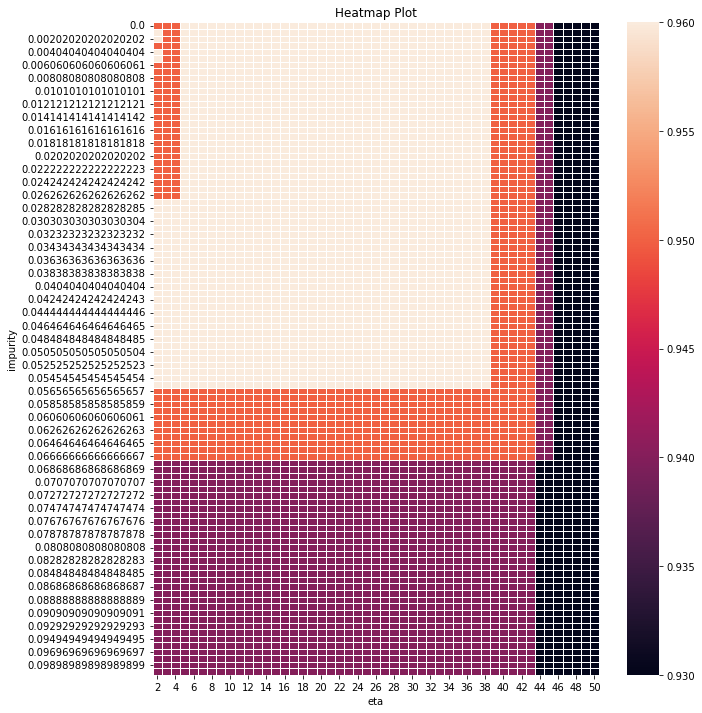

/home/felix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



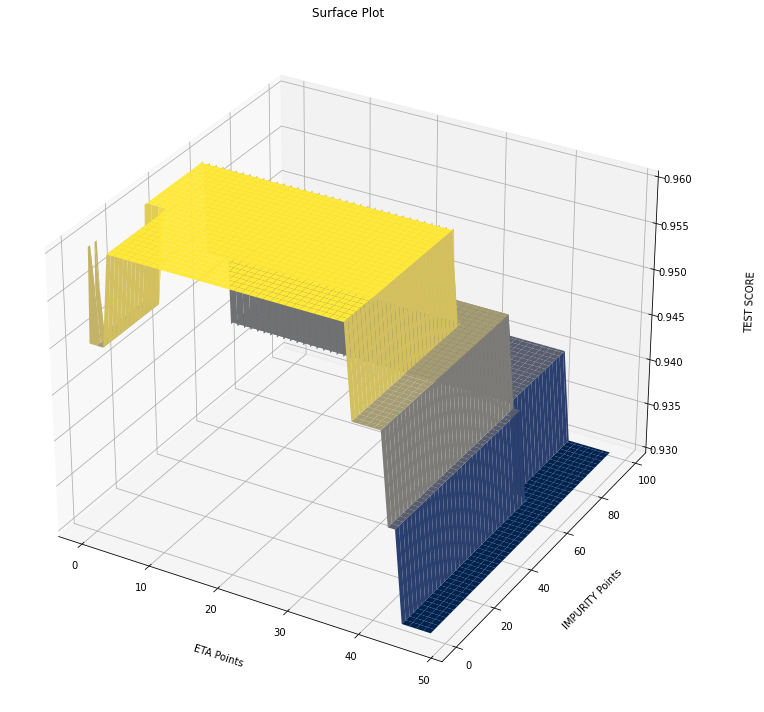

Split Criterio: entropy
La mejor configuración posible con este Dataset es con min_impurity_decrease = 0.0 eta = 5 Score: [[0.96]]
__________________________________________________________________________________
Split Criterio: gini


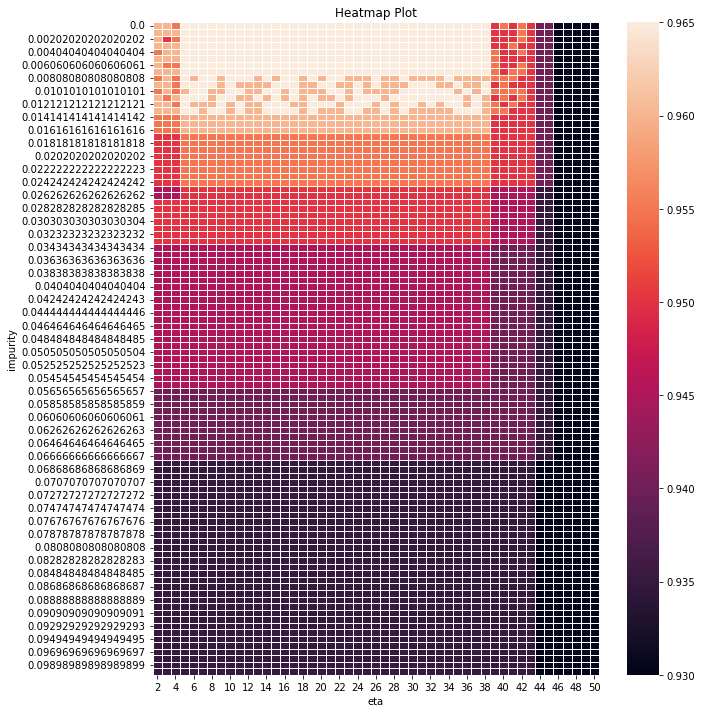

/home/felix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



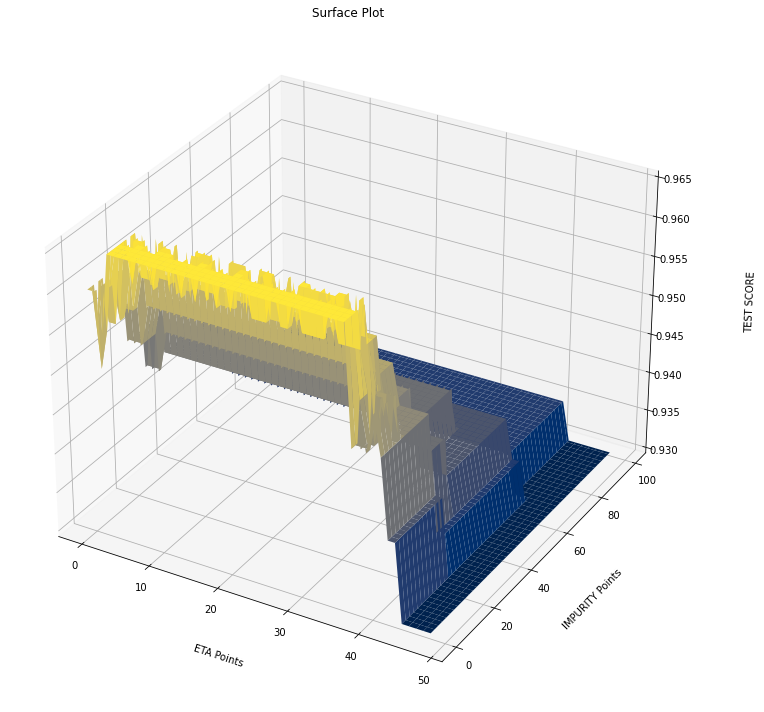

Split Criterio: gini
La mejor configuración posible con este Dataset es con min_impurity_decrease = 0.0 eta = 5 Score: [[0.965]]


In [14]:
criterio, min_impurity_dec, eta = analyze_dt_performances(iris_X,iris_y)

## Breast Cancer Dataset Analysis

__________________________________________________________________________________
Split Criterio: entropy


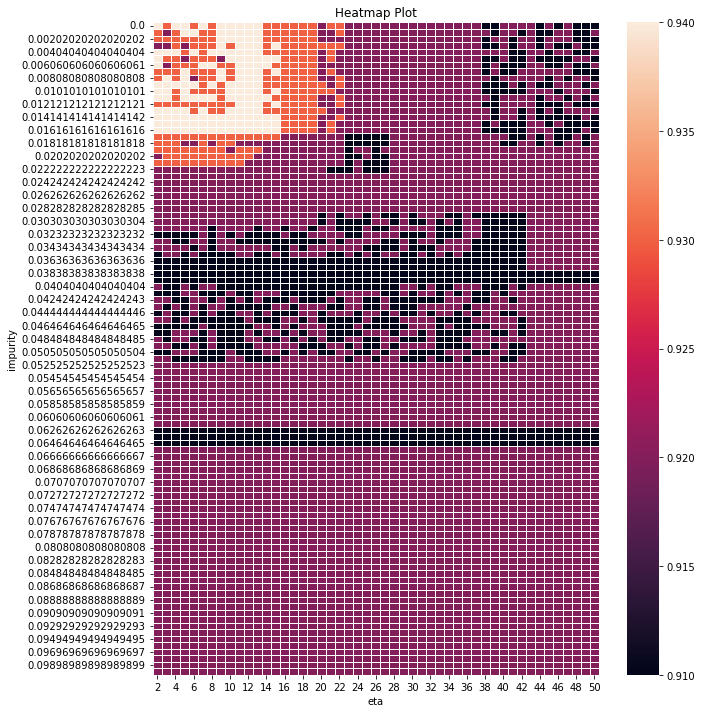

/home/felix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



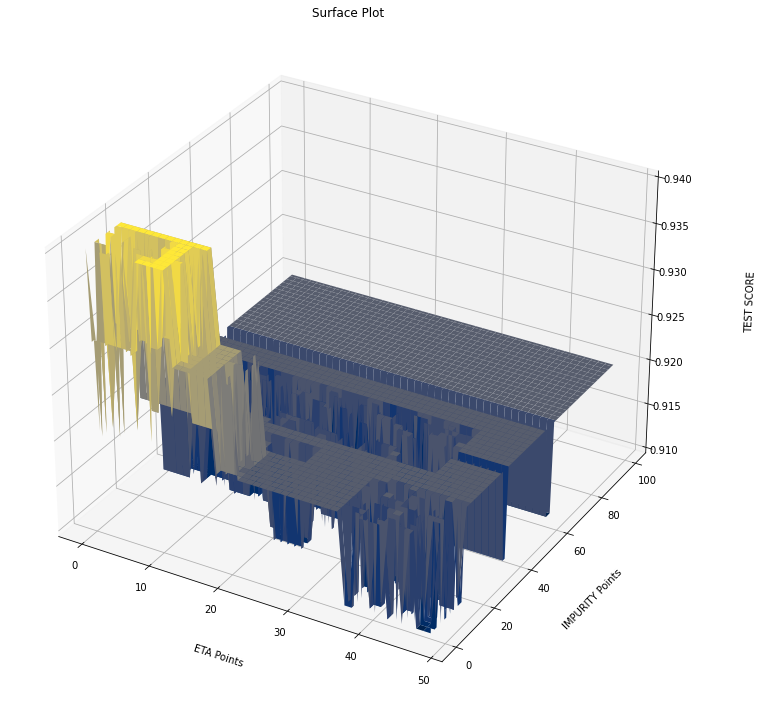

Split Criterio: entropy
La mejor configuración posible con este Dataset es con min_impurity_decrease = 0.0 eta = 2 Score: [[0.94]]


KeyboardInterrupt: 

In [15]:
criterio, min_impurity_dec, eta = analyze_dt_performances(breast_X,breast_y)

## Digits Dataset Analysis

In [ ]:
criterio, min_impurity_dec, eta = analyze_dt_performances(digits_X,digits_y)

## Wine Dataset Analysis

In [ ]:
criterio, min_impurity_dec, eta = analyze_dt_performances(wine_X,wine_y)

#**Exercise 3**

1. Investigate on the pruning technique related to the hyperparameter ccp_alpha. Concisely describe in your own words the difference between the pruning realized with ccp_alpha and reduced error pruning seen in class. 
Give a range of reasonable values for this hyperparameter and argue why.

2. Write a function test_pruning will evaluate, using MCCV with 100 repeats, the effect of this pruning technique on the given database, using 20 different values of ccp_alpha. Choose the range of these values according to your arguments in the first sub-exercise.
Use sklearn.tree.plot_tree to plot the decision tree without pruning and the tree with the best performance used pruning (if there is any improvement possible).

3. Apply your function to all datasets in B and make an assessment of whether the tree
overfits the data without using this type of pruning and whether/by how much the
accuracy can be improved using this pruning technique

3.1 La diferencia entre  **Reduce error pruning** y el **Cost complexity pruning**, en pocas palabras consiste en que el **Reduced Error Pruning** es iterativo y finaliza solo con los parámetros dados, de usa forma elige el nivel óptimo de pureza. 

Por otro lado el **Cost Complexity Pruning** realiza el cálculo de la sección o rama que contenga la conexión más débil y la caracteriza por un **alfa** más pequeño. Para el calculo del **alfa** se compara el error de clasificación del nodo antes de la división versus la suma de los errores de la clasificación de hojas finales, si la proporción del nodo es más pequeña que las ramas, es posible efectuar el pruning. 

La librería de sklearn tiene la función de **cost_complexity_pruning_path**, la cual proporciona los alfas efectivos de los subárboles durante la poda y también las impurezas correspondientes.

3.2

In [16]:
tree = sklearn.tree.DecisionTreeClassifier(random_state= 0)

In [17]:
ccp_alfa = [0.010,0.012,0.014,0.015,0.017,0.023,0.029,0.035,0.036,0.039,0.10,0.13,0.14,0.15,0.19,0.25,0.30,0.39,0.40,0.41]

def test_pruning(X, y):
  repetitions=100
  for i in range(repetitions):
      precision = []
      for a in ccp_alfa:
          X_train, X_test, y_train, y_test = train_test_split(X, y)
          decision_tree = sklearn.tree.DecisionTreeClassifier(ccp_alpha= a)
          decision_tree.fit(X_train, y_train)
          y_train_pred = decision_tree.predict(X_train)
          y_test_pred = decision_tree.predict(X_test)
          precision.append(accuracy_score(y_test, y_test_pred))
      
      position = np.argmax(precision)
      alfa_nuevo = ccp_alfa[position]   

  fig, axarr = plt.subplots(1,2, figsize=[12, 6])

  fig.add_subplot(axarr[0])
  tree_ajustado = decision_tree.fit(X, y)
  y_train_pred = decision_tree.predict(X_train)
  y_test_pred = decision_tree.predict(X_test)
  calculo_precision = accuracy_score(y_test, y_test_pred)
  sklearn.tree.plot_tree(tree_ajustado, filled=True, rounded=True,)
  print("La precision sin pruning:", calculo_precision)

  fig.add_subplot(axarr[1])
  decision_tree_nuevo = sklearn.tree.DecisionTreeClassifier(ccp_alpha= alfa_nuevo)
  tree_ajustado = decision_tree_nuevo.fit(X, y)
  y_train_pred = decision_tree_nuevo.predict(X_train)
  y_test_pred = decision_tree_nuevo.predict(X_test)
  calculo_precision = accuracy_score(y_test, y_test_pred)
  sklearn.tree.plot_tree(tree_ajustado, filled=True, rounded=True,)
  print("La precision, con un alfa de:", alfa_nuevo, "luego del pruning es ", calculo_precision)

3.3

La precision sin pruning: 0.3684210526315789
La precision, con un alfa de: 0.012 luego del pruning es  0.9736842105263158


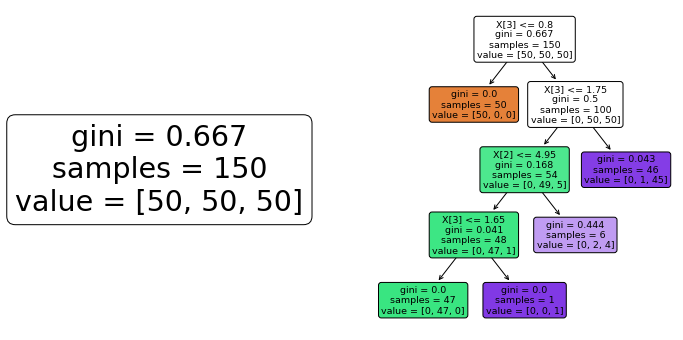

In [18]:
test_pruning(iris_X,iris_y)

La precision sin pruning: 0.5664335664335665
La precision, con un alfa de: 0.01 luego del pruning es  0.958041958041958


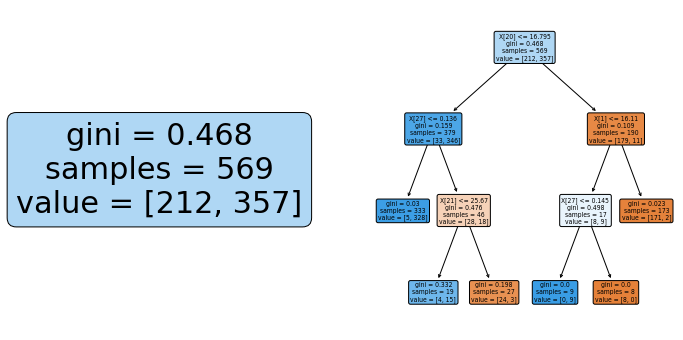

In [19]:
test_pruning(breast_X,breast_y)

La precision sin pruning: 0.6433566433566433
La precision, con un alfa de: 0.01 luego del pruning es  0.986013986013986


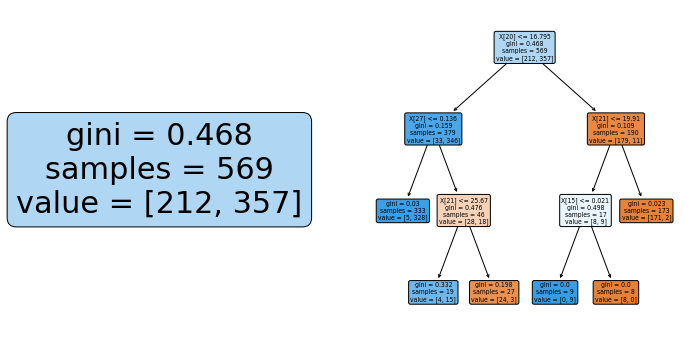

In [20]:
test_pruning(breast_X,breast_y)

La precision sin pruning: 0.5111111111111111
La precision, con un alfa de: 0.036 luego del pruning es  0.9333333333333333


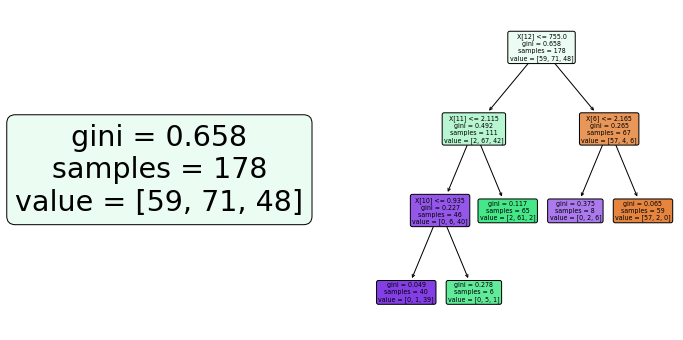

In [21]:
test_pruning(wine_X,wine_y)